<a href="https://colab.research.google.com/github/samhimit/3d-printed-paintings/blob/main/3d_Printed_Paintings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###3d Printed Paintings

In [1]:
#import numpy-stl into collab
!pip install numpy-stl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[[  0.     0.    64.25]
 [  1.     0.    64.25]
 [  1.     0.    64.25]
 ...
 [105.   106.    64.25]
 [105.   106.    64.25]
 [106.   106.    64.25]]


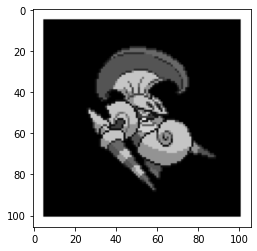

In [6]:
import numpy as np
from stl import mesh
from numpy.random import default_rng
import PIL
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from numpy import asarray

# Open the uploaded file to convert, place the picture you want to convert in this location
img = PIL.Image.open("/home/mypaint.png")

# Start by converting the image into grayscale
gray_img = img.convert("L")
# Inverting the image can sometimes lead to better conversion results, especially when on a dark background
# Gray_img = ImageOps.invert(gray_img)
gray_img = gray_img.transpose(Image.FLIP_LEFT_RIGHT)
# Adding a white border to the image allows for a smooth transition to the container
gray_img = ImageOps.expand(gray_img,border=5,fill='white')



data = asarray(gray_img)
width = gray_img.width
height = gray_img.height
# Conv dictates the "strength" of how much the differences in color affect height, could also be referred to as contrast
conv = .50
# Scaler is final transformation that stretches or flattens the entire image
scaler = .5
# Creates an array filled with x and y coordinates and the grayscale value located at that pixel
# To create a more detailed and readable picture, we create 4 points for every pixel, allowing each pixel to become a face

lst = [] 
for i in range(height):
  # For loop here creates "two" rows of vertices for every row of pixels, stacking the second on top of the next row
  for k in range(2):
    for j in range(width):
     y = (256-data[i][j]*conv)*scaler
     x = [j,i+k,y]
     lst.append(x)
     # Stacks a vertice on top of the next location
     x = [j+1,i+k,y]
     lst.append(x)

vertices = np.array(lst)
# Printing vertice list to console
print(vertices)
# Showing processed image for direct comparision
plt.imshow(gray_img, cmap='gray')
plt.savefig("gray_pic.jpg")




# Defining vertices of the container
containerVertices = np.array([\
    [0, 0, 0],
    [0, 0, (256-data[0][0]*conv)*scaler],
    [0, height, 0],
    [0, height, (256-data[0][0]*conv)*scaler],
    [width, 0, 0],
    [width, 0, (256-data[0][0]*conv)*scaler],
    [width, height, 0],
    [width, height, (256-data[0][0]*conv)*scaler]])
# Defining faces of the container
containerFaces = np.array([\
    [0, 2, 4],
    [6, 4, 2],
    [1, 2, 0],
    [3, 2, 1],
    [4, 1, 0],
    [1, 4, 5],
    [5, 4, 6],
    [5, 6, 7],
    [2, 3, 6],
    [6, 3, 7]])

# x and y of our vertices of the image, we created 4 vertices for every pixel
x = width*2
y = height*2

pointsnum = x*y
size = x*y-1
facenum = (x-1)*(y-1)*2

faces = np.zeros((facenum,3),int)
# Go through and definte all the faces of the image, simple solution
location = 0
for i in range(pointsnum):
    # This for loop defines all triangles where the right angle is in the top left
    if (i + 1) % x != 0 and i+x <= size: # Check to see it doesn't go to a new line or out of bounds
      faces[location,0] = i # Always going to be the start
      faces[location,1] = i+1 # Use index one to the right
      faces[location,2] = i+x # Needs to be the vertice below, which is the length of the array away, so here it is 3
      location += 1
    # This for loop defines all triangles where the right angle is in the bottom right
    if i%x != 0 and i-x >= 0: #Check if out of bounds or different line
      faces[location,0] = i # Same as above
      faces[location,1] = i-1 # Use the index one to the left
      faces[location,2] = i-x # Same logic as above but in reverse, to find the vertice above
      location += 1
# Create the meshes
containerMesh = mesh.Mesh(np.zeros(containerFaces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(containerFaces):
    for j in range(3):
        containerMesh.vectors[i][j] = containerVertices[f[j],:]
imageMesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        imageMesh.vectors[i][j] = vertices[f[j],:]
# Combine the container to the image
combined = mesh.Mesh(np.concatenate([imageMesh.data, containerMesh.data]))
# Save the mesh to file "model.stl"
# Found under content tab
combined.save('model.stl')